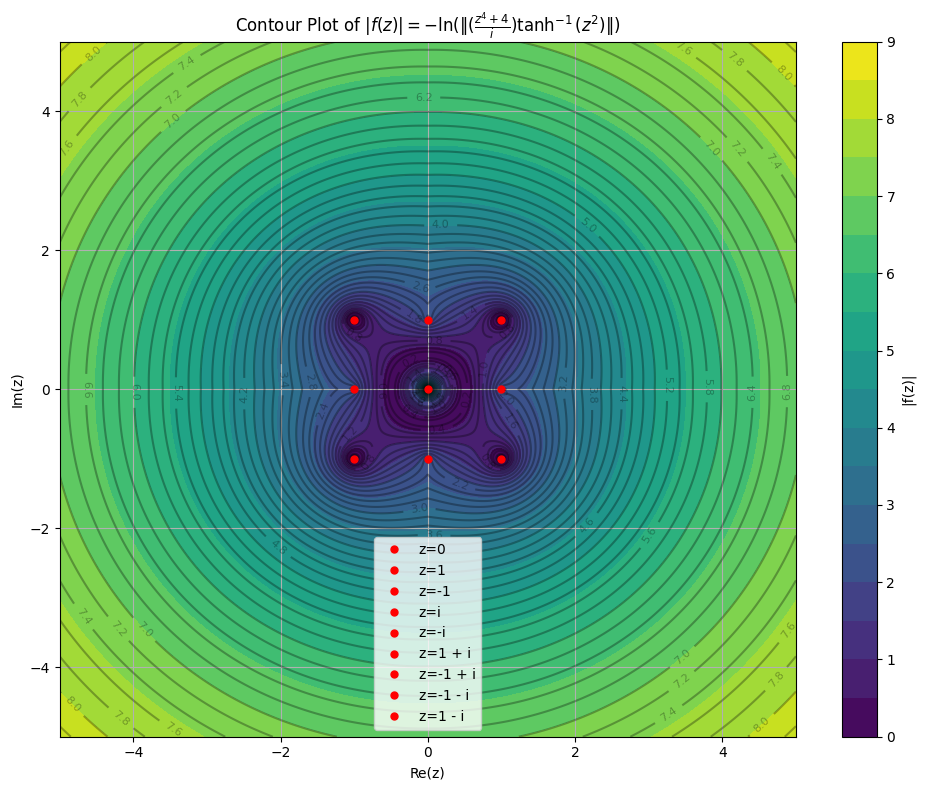

In [418]:
import matplotlib.pyplot as plt
import numpy as np

# Create a grid of complex values
real = np.linspace(-5, 5, 1000)
imag = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(real, imag)
Z = X + 1j*Y  # Complex grid

# Identify singular points
singular = (np.abs(Z) < 1e-10)
f_values = np.zeros_like(Z, dtype=complex)

def f(z):
    # See: ... (link to research report)
    return np.log(1 / (np.abs(((z**4 + 4) / 1j) * np.atanh(z**2))))

f_values[~singular] = f(Z[~singular])
f_values[singular] = np.nan

magnitude = np.abs(f_values)
magnitude = np.clip(magnitude, 0, 15)

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, magnitude, 20, cmap='viridis')
plt.colorbar(contour, label='|f(z)|')
plt.title(r'Contour Plot of $|f(z)| = -\ln(\|(\frac{z^4 + 4}{i})\tanh^{-1}(z^2)\|)$')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True)

contour_lines = plt.contour(X, Y, magnitude, 50, colors='black', alpha=0.3)
plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%.1f')

plt.plot(0, 0, 'ro', markersize=5, label='z=0')
plt.plot(1, 0, 'ro', markersize=5, label='z=1')
plt.plot(-1, 0, 'ro', markersize=5, label='z=-1')
plt.plot(0, 1, 'ro', markersize=5, label='z=i')
plt.plot(0, -1, 'ro', markersize=5, label='z=-i')
plt.plot(1, 1, 'ro', markersize=5, label='z=1 + i')
plt.plot(-1, 1, 'ro', markersize=5, label='z=-1 + i')
plt.plot(-1, -1, 'ro', markersize=5, label='z=-1 - i')
plt.plot(1, -1, 'ro', markersize=5, label='z=1 - i')
plt.legend()

plt.tight_layout()
plt.show()


In [415]:
def print_crit_values(fn, *args):
    # Split into real, imaginary and complex valued
    cr, ci, z = [], [], []
    for a in args:
        if not isinstance(a, complex):
            return ValueError('Must provide complex valued args only!')
        if a.imag == 0:
            cr.append(a)
        elif a.real == 0:
            ci.append(a)
        else:
            z.append(a)

    with np.errstate(divide='ignore', invalid='ignore'):
        reals = [f'{_in} |-> {out}' for (_in, out) in zip(cr, map(fn, cr))]
        imags = [f'{_in} |-> {out}' for (_in, out) in zip(ci, map(fn, ci))]
        comps = [f'{_in} |-> {out}' for (_in, out) in zip(z, map(fn, z))]

        if reals:
            print(f'R: {" ".join(reals)}')
        if imags:
            print(f'I: {" ".join(imags)}')
        if comps:
            print(f'Z: {" ".join(comps)}')
        

# Let's check some critical values 
print_crit_values(f, 1 + 0j, -1 + 0j, 1j, -1j, 1 + 1j, -1 + 1j, -1 - 1j, 1 - 1j, 0 + 0j)

R: (1+0j) |-> -inf (-1+0j) |-> -inf 0j |-> inf
I: 1j |-> -inf (-0-1j) |-> -inf
Z: (1+1j) |-> inf (-1+1j) |-> inf (-1-1j) |-> inf (1-1j) |-> inf


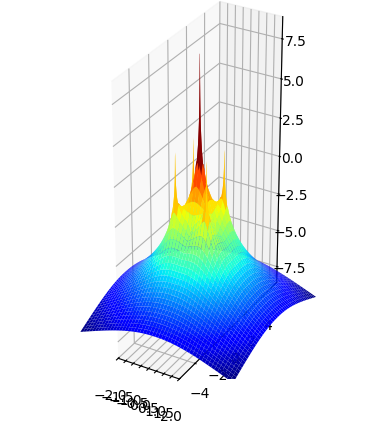

In [419]:
from matplotlib import cm


def freal(x, y):
    num = np.sqrt((x**2 - y**2 - 1)**2 + 4*x**2*y**2)
    denom = np.abs(np.atanh(1j*(x + 1j*y)))
    return np.log(num / denom)


U = f(X + 1j * Y)
# OR U = freal(X, Y)


def proj_plot(X, Y, U):
    ax = plt.axes(projection='3d')
    plt.xlim([-2, 2])

    ax.plot_surface(X, Y, U, cmap=cm.jet)
    ax.set_box_aspect( (np.diff(ax.get_xlim())[0],
                        np.diff(ax.get_ylim())[0],
                        np.diff(ax.get_zlim())[0]))
    ax.set_aspect('equal')

    plt.show()


proj_plot(X, Y, U)

/var/folders/4p/mdyxgfk5375f1cptthl9dx9h0000gn/T/ipykernel_47107/1781919620.py:10: RuntimeWarning: divide by zero encountered in log
  return 1/2 * np.log(G(r, theta)) - H(r, theta)


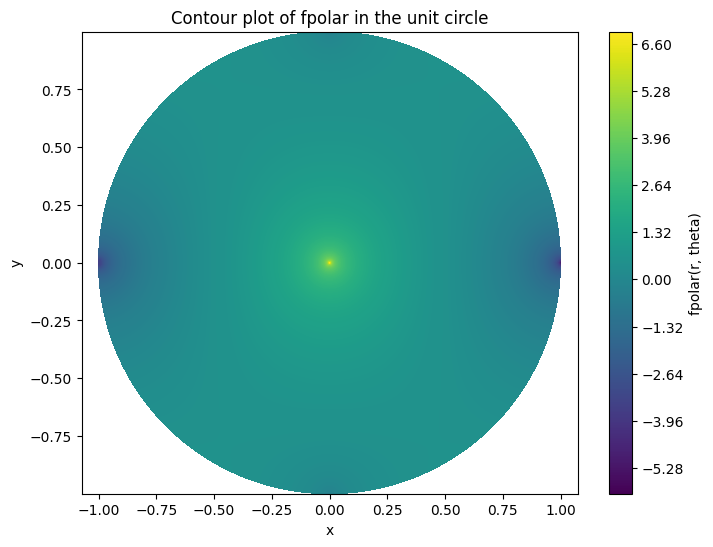

In [420]:
def G(r, theta):
    return r**4 - 2*r**2*np.cos(2 * theta) + 1


def H(r, theta):
    return np.log(np.abs(np.atanh(1j * r * np.exp(1j * theta))))


def fpolar(r, theta):
    return 1/2 * np.log(G(r, theta)) - H(r, theta)


r = np.linspace(0.001, 1, 1000)
theta = np.linspace(0, 2*np.pi, 300)
R, Theta = np.meshgrid(r, theta)

Z2 = fpolar(R, Theta)
X2 = R * np.cos(Theta)
Y2 = R * np.sin(Theta)

# Plot using a contour plot:
plt.figure(figsize=(8, 6))
contour = plt.contourf(X2, Y2, Z2, levels=500, cmap='viridis')
plt.colorbar(contour, label='fpolar(r, theta)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of fpolar in the unit circle')
plt.axis('equal')
plt.show()

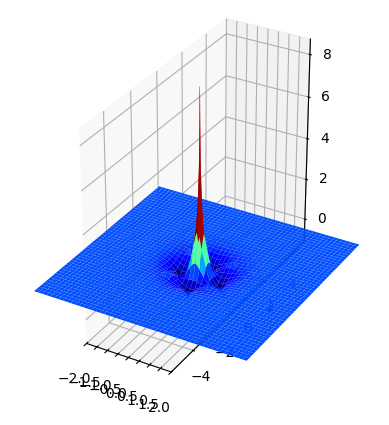

R: (1+0j) |-> -inf (-1+0j) |-> -inf 0j |-> inf
I: 1j |-> -inf (-0-1j) |-> -inf
Z: (1+1j) |-> inf (-1+1j) |-> inf (-1-1j) |-> inf (1-1j) |-> inf


In [421]:
# Now let's try applying the gaussian function
def f2(z):
    return np.real(np.exp(-z * np.conjugate(z)) * f(z))


U2 = f2(X + 1j * Y)
proj_plot(X, Y, U2)

# Let's check the critical values still hold
print_crit_values(f, 1 + 0j, -1 + 0j, 1j, -1j, 1 + 1j, -1 + 1j, -1 - 1j, 1 - 1j, 0 + 0j)